# Cloning Quasars (sampling from arbitrary distribution)

Download the SDSS quasar data

In [2]:
import numpy as np
import scipy.stats
import astropy
import pylab as plt

(vedi sotto)  
Oss: 
Quasars = fetc_dr7_quasars is a a structured NumPy array (like a table, similar to a Pandas DataFrame) where
- Each row represents a quasar.
- Each column (or field) stores a different property of the quasar, like:
    - redshift
    - ra (right ascension)
    - dec (declination)
    - ...

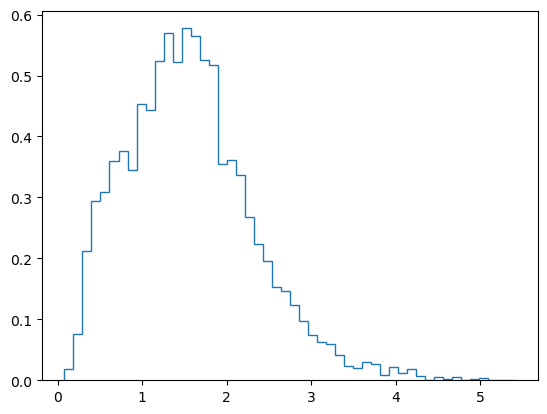

In [3]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
quasars = fetch_dr7_quasar() 

# select the first 10000 points
quasars = quasars[:10000]

#select redhsift row
data = quasars['redshift']

plt.hist(data,bins=50,histtype='step',density=True,label='original data');

## Exercise instructions
1. Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
2. Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
3. Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

The package [astropy](https://www.astropy.org/) contains a ton of useful astro things. For instance, the best-fit cosmological model from the latest Plack data is:

### 1. Cloning by rejection sampling

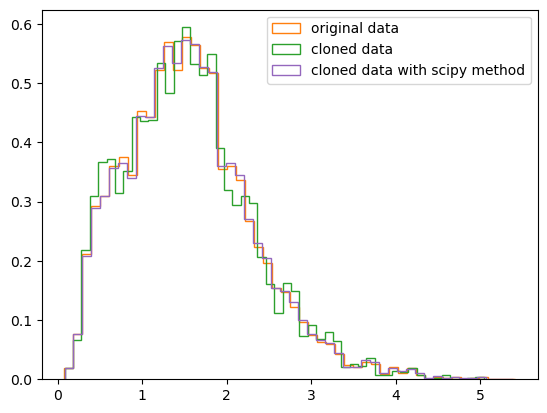

In [55]:
plt.hist(data, bins=50, histtype='step', density=True, label='original data', color = 'C1')

# make a simple histogram object
counts, bins = np.histogram(data, bins=50, density=True)
f_max = counts.max() # maximum of f distribution

f = scipy.stats.rv_histogram((counts,bins)) # Generates a distribution given by a histogram

N = 100000
x = np.random.uniform(-20, 20, N) # I choose extremes watching the plot
y = np.random.uniform(0, f_max, N)

goodpoints = x[y<f.pdf(x)]

plt.hist(goodpoints, bins=50, density=True, histtype='step', label='cloned data', color = 'C2')

#Same but with scipy disth.rvs(size=N) method...it's easier
plt.hist(f.rvs(size=N),bins=50,density=True,histtype='step',label='cloned data with scipy method', color = 'C4') # .rvs generate random variates of given type
plt.legend()

plt.legend()

### 2. Cloning by inverse transform

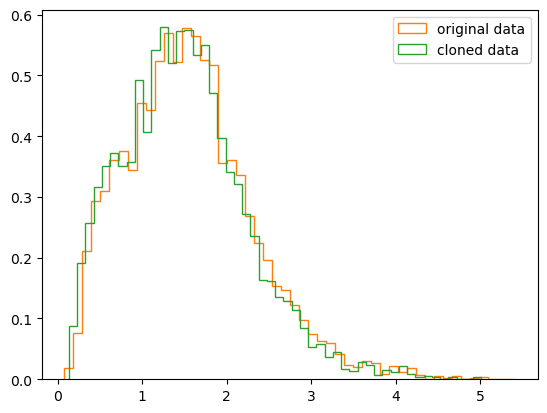

In [66]:
plt.hist(data, bins=50, histtype='step', density=True, label='original data', color = 'C1')

counts, bins = np.histogram(data, bins=50, density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins, bins[1:] all right edges, bins[:-1] all left edges

simple_cdf = np.cumsum(counts) / np.sum(counts) # np.cumsum: array of the same length, where each element is the sum of all previous elements;  np.sum normalizes so the last value equals 1

# Inverse cdf with interpolation of the cdf with x-->y  y-->x
inverse_cdf =  scipy.interpolate.interp1d(simple_cdf, bin_mids) # interp1d(x, y) 

N = 10000
y = np.random.uniform(min(simple_cdf), max(simple_cdf), N)
x = inverse_cdf(y)

plt.hist(x, bins=50, histtype='step', density=True, label='cloned data', color = 'C2')

plt.legend()

### 3. Theoretical distribution of quasars (not very clear...)

Let's try to assume that quasars are distributed uniformly in comoving volume in the Universe. Seems fair...

We use the cosmological parameters as measured by the Plack satellite, which is a flat $\Lambda$ CDM model



In [ ]:
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)

In [ ]:
z_vals = np.linspace(0,5,100)
comvol = astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value

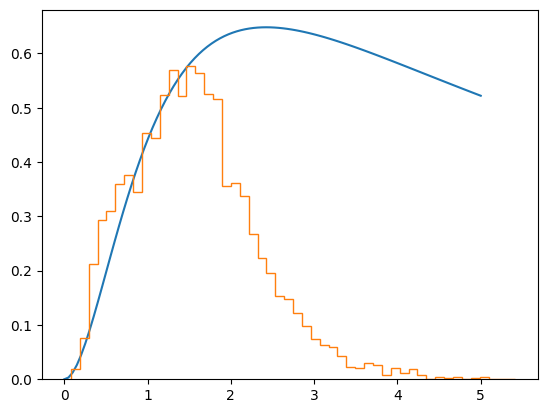

In [ ]:
z = np.linspace(0,5,100)
plt.plot(z,comvol/6.5e10) ###   Arbitrary normalization, just matching by eye

plt.hist(data,bins=50,histtype='step',density=True,label='original data');

They are not distributed unifiormly in comoving volume! I mean, they are but only at low redshits.

Surely are all quasars created equally? But do we see them equally?